In [1]:
!pip install -U matplotlib==3.4.3 seaborn==0.11.2

In [2]:
from tempfile import NamedTemporaryFile

import matplotlib.font_manager as fm
import requests

sc_font_url = 'https://github.com/google/fonts/blob/main/ofl/notosanssc/NotoSansSC-Medium.otf?raw=true'
sc_font_name = 'NotoSansSC-Medium.otf'

with requests.get(sc_font_url) as response:
  raw = response.content
  with open(sc_font_name, 'wb') as f:
    f.write(raw)
    f.close()


sc_prop = fm.FontProperties(fname=sc_font_name)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (8, 6)

In [6]:
data_url = 'https://github.com/genzj/data-visualization-course/raw/master/data/food-demand-forecasting/food-demand.csv'
df = pd.read_csv(data_url, index_col=0)
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


### 绘制各周收入情况图

1. 定义收入为 $revenue = checkout\_price \times number\_orders$
2. 将收入按周（`groupby()`)汇总(`sum()`)
3. 使用plot绘制折线图

In [7]:
revenue = df.checkout_price * df.num_orders

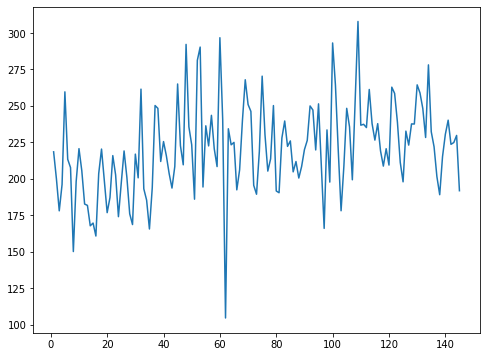

In [8]:
plt.plot(revenue.groupby(df.week).sum() / 1_000_000)
plt.show()

### 定制图形


API参考页面：
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

![figure1](https://github.com/genzj/data-visualization-course/raw/master/ch01-food-demanding/fig1.png)

![anatomy](https://matplotlib.org/stable/_images/anatomy.png)

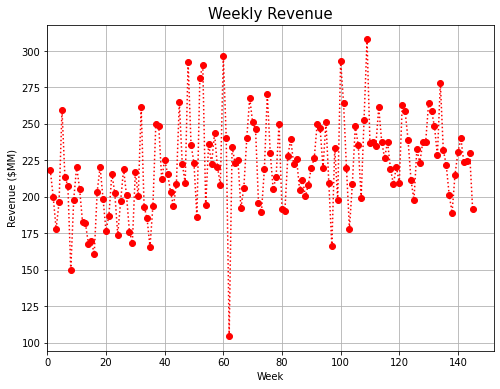

In [9]:
plt.plot(revenue.groupby(df.week).sum() / 1_000_000, 'r:o')
plt.title('Weekly Revenue', fontsize=15)
plt.xlabel('Week')
plt.ylabel('Revenue ($MM)')
plt.grid()
plt.xlim(0)
plt.show()

### 散点图

1. 随机抽取5%的数据绘图（数据总量太大，全量绘图性能太差）
2. 定义优惠 $discount=base\_price - checkout\_price$
3. 绘制散点图表示优惠金额和订单数量（`num_orders`)的关系
4. 使用颜色区分菜系(`cuisine`)
   ```python
   {'Thai': 'tab:green', 'Indian': 'tab:orange', 'Italian': 'tab:green', 'Continental': 'black'}
   ```

![figure2](https://raw.githubusercontent.com/genzj/data-visualization-course/master/ch01-food-demanding/fig2.png)

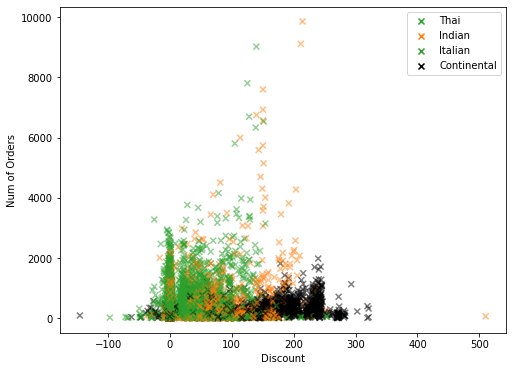

In [10]:
colormap = {'Thai': 'tab:green', 'Indian': 'tab:orange', 'Italian': 'tab:green', 'Continental': 'black'}
subframe = df.sample(frac=0.05, random_state=42)
discount = subframe.base_price - subframe.checkout_price


scatters = plt.scatter(x=discount, y=subframe.num_orders, marker='x', alpha=0.5, c=subframe.cuisine.map(colormap))
plt.xlabel('Discount')
plt.ylabel('Num of Orders')
plt.legend(
    handles=[plt.scatter(x=[], y=[], marker='x', c=color, label=name) for name, color in colormap.items()]
)
plt.show()

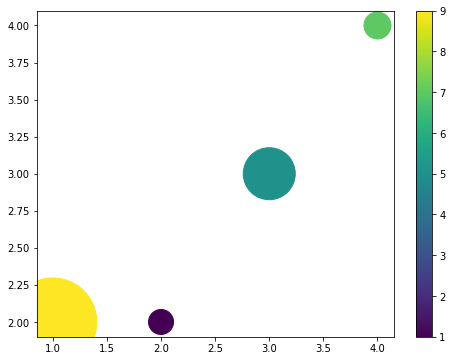

In [11]:
plt.scatter([1,2,3,4], [2,2,3,4], c=[9, 1, 5, 7], s=[88**2, 25**2, 52**2, 27**2])
plt.colorbar()
plt.show()

### 饼图

绘制饼图表示不同菜系(`cuisine`)在订单中的分布情况(`value_counts`)。

![figure3](https://raw.githubusercontent.com/genzj/data-visualization-course/master/ch01-food-demanding/fig3.png)

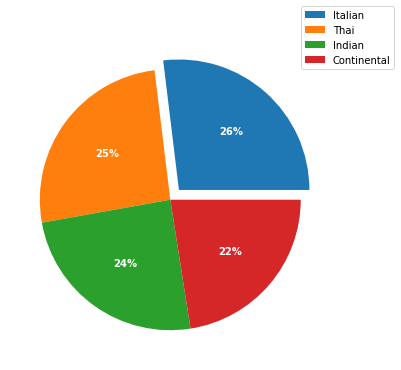

In [12]:
by_cuisine = df.cuisine.value_counts()
plt.pie(
    by_cuisine,
    explode=[0.1, 0, 0, 0],
    labels=by_cuisine.index,
    autopct='%d%%',
    textprops={'color': 'white', 'weight': 700}
)
plt.legend(loc=(0.9, 0.9))
plt.show()

### 柱状图和高级定制

使用柱状图，绘制不同餐饮分类的订单数量。并定义图形样式。

[API参考页面](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

[术语表](https://matplotlib.org/stable/_images/anatomy.png)

[色彩表](https://www.w3schools.com/colors/colors_names.asp)

![figure4](https://raw.githubusercontent.com/genzj/data-visualization-course/master/ch01-food-demanding/fig4.png)

In [13]:
table = df.groupby('category').num_orders.sum()
table

category
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122
Name: num_orders, dtype: int64

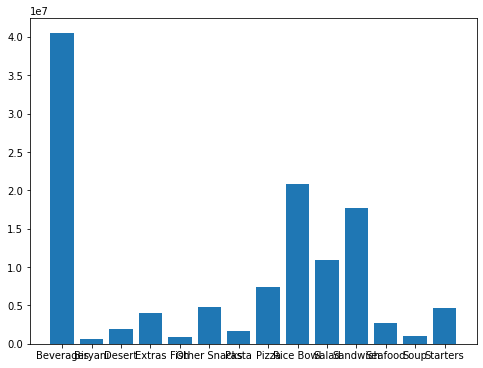

In [14]:
plt.bar(table.index, table)
plt.show()

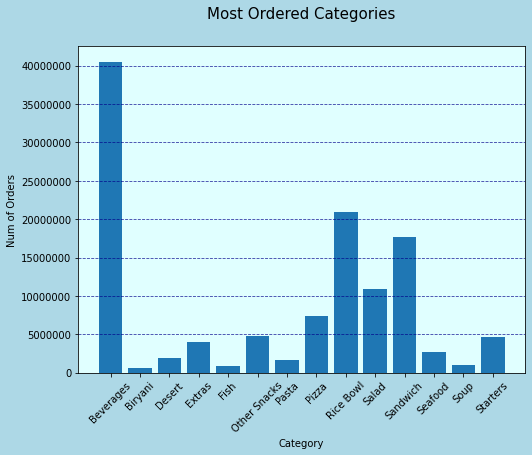

In [15]:
plt.figure(facecolor='lightblue')
plt.axes(facecolor='lightcyan')
plt.bar(table.index, table)

plt.title('Most Ordered Categories', fontsize=15, pad=28)
plt.xlabel('Category')
plt.ylabel('Num of Orders')
plt.tick_params(axis='x', labelrotation=45, labelsize=10)
plt.ticklabel_format(axis='y', style='plain')

plt.grid(axis='y', linestyle='--', color='darkblue', alpha=0.8)
plt.show()

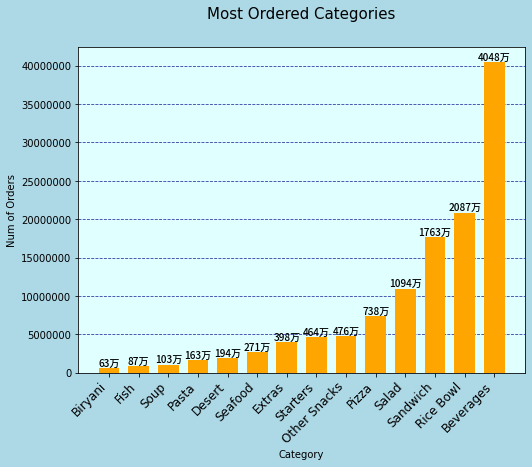

In [16]:
table.sort_values(inplace=True)

plt.figure(facecolor='lightblue')
plt.axes(facecolor='lightcyan')
bars = plt.bar(table.index, table, zorder=100, width=0.7, color='orange')
plt.bar_label(bars, labels=[f'{int(x/10000)}万' for x in table], fontproperties=sc_prop)

plt.title('Most Ordered Categories', fontsize=15, pad=28)
plt.xlabel('Category')
plt.ylabel('Num of Orders')
plt.xticks(rotation=45, size=12, horizontalalignment='right')
plt.ticklabel_format(axis='y', style='plain')

plt.grid(axis='y', linestyle='--', color='darkblue', alpha=0.8)
plt.show()